# Milestone 3 - Regression Simulation 

## Author - Shuyang Ren


## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [2]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"

In [3]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
from scipy.stats import zscore
import statsmodels.graphics.tsaplots as splt
import statsmodels.tsa.seasonal as sts
from statsmodels.tsa.stattools import adfuller

Dairy = pd.read_csv(fileName)
Dairy.head()

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
0,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
2,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
3,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
4,1995,May,4.470,73.730,2.227,0.8967,5,25,125


In [4]:
# Check datatypes
Dairy.dtypes

Year                   int64
Month                 object
Cotagecheese.Prod    float64
Icecream.Prod        float64
Milk.Prod            float64
N.CA.Fat.Price       float64
Month.Count            int64
monthNumSqred          int64
monthNumCubed          int64
dtype: object

Text(0.5, 0, 'Time')

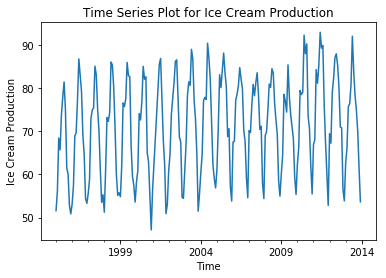

In [5]:
# Fixing Date
Dairy.index = pd.date_range(start = '1-1-1995', end = '12-31-2013', freq = 'M')
# For this assignment I will be focusing on the Ice Cream production
Ice_cream = Dairy.loc[:,"Icecream.Prod"]
Ice_cream.plot()
plt.title('Time Series Plot for Ice Cream Production')
plt.ylabel('Ice Cream Production')
plt.xlabel('Time')

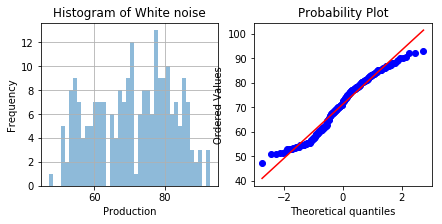

In [6]:
def dist_ts(ts, lab = '', bins = 40):
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    ts.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Production')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of ' + lab)
    ## Plot the q-q plot on the other axes
    scipy.stats.probplot(ts, plot = ax2)
    
dist_ts(Ice_cream, lab = 'White noise')

C:\Users\shuya\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


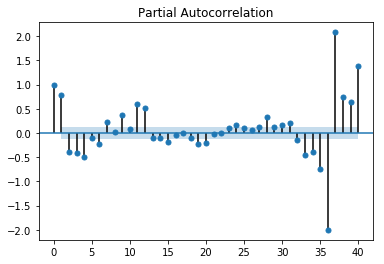

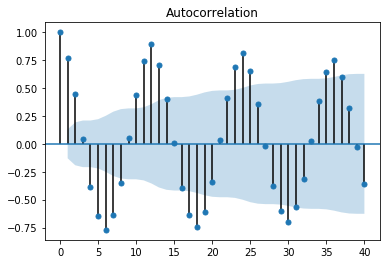

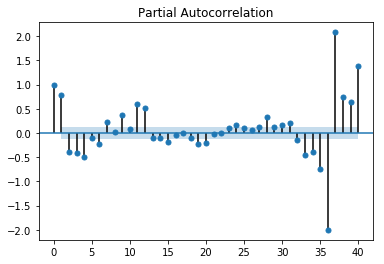

In [7]:
# (Above) Does not look like a normal distribution
# looking at autocorrelations
splt.plot_acf(Ice_cream, lags = 40)
splt.plot_pacf(Ice_cream, lags = 40)

               resid      trend   seasonal
1995-01-31       NaN        NaN -10.272597
1995-02-28       NaN        NaN  -6.441930
1995-03-31       NaN        NaN   4.732371
1995-04-30       NaN        NaN   5.813755
1995-05-31       NaN        NaN   7.914674
1995-06-30       NaN        NaN  15.620839
1995-07-31  3.573847  64.664208  13.236945
1995-08-31  1.449682  64.784958   8.746359
1995-09-30 -2.044394  64.862167  -1.287773
1995-10-31  0.642682  65.046625  -5.667307
1995-11-30  2.361097  65.363625 -14.952722
1995-12-31  2.409115  65.883500 -17.442615


,resid,trend,seasonal
2013-01-31,0.276097,72.608500,-10.272597
2013-02-28,0.245763,72.470167,-6.441930
2013-03-31,-1.512621,72.550250,4.732371
2013-04-30,-2.094630,72.676875,5.813755
2013-05-31,0.138326,72.846000,7.914674
2013-06-30,3.429536,73.040625,15.620839
2013-07-31,NaN,NaN,13.236945
2013-08-31,NaN,NaN,8.746359
2013-09-30,NaN,NaN,-1.287773
2013-10-31,NaN,NaN,-5.667307


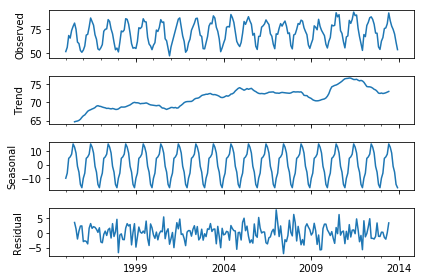

In [8]:
# (Above) From the grpahs I would suggest that dairy production of ice cream is stationary
# Stastics seems to stay constant overtime and ACF is not moving

# Now onto decomposition
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

decomp = decomp_ts(Ice_cream)
print(decomp[:12])
decomp[-12:]
#res_mean = res_df.resid.mean()
#if abs(res_mean) > 0.1: res_df.resid = [x - res_mean for x in res_df.resid]

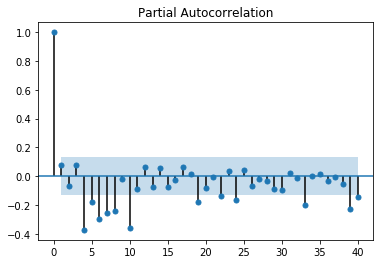

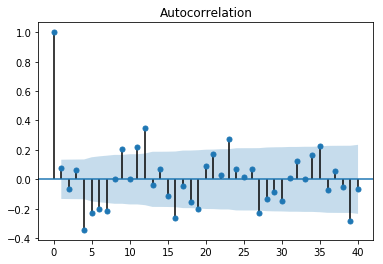

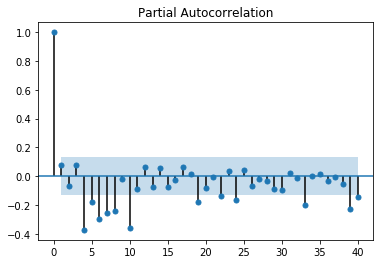

In [9]:
splt.plot_acf(decomp['1995-07-31':'2013-06-30'].resid, lags = 40)
splt.plot_pacf(decomp['1995-07-31':'2013-06-30'].resid, lags = 40)

In [10]:
# Dickey-Fuller
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
DF_Test(decomp.resid[6:-6])

D-F statistic = -10.615314403551848
p-value = 5.694807144315272e-19
number of lags used = 9
Critical value at 5% confidence = -2.8756749365852587
Critical value at 10% confidence = -2.5743041549627677


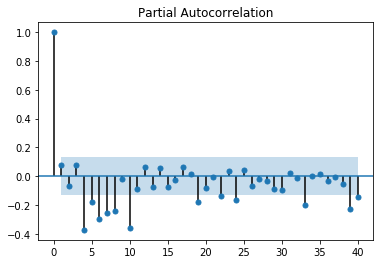

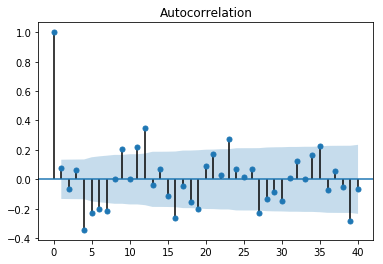

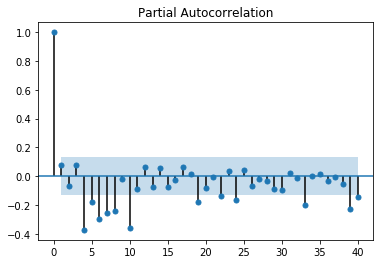

In [11]:
splt.plot_acf(decomp.resid[6:-6], lags = 40)
splt.plot_pacf(decomp.resid[6:-6], lags = 40)

In [12]:
# Apply ARIMA Model
def model_ARIMA(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    print(model_fit.summary())
    return(model_fit)
ice_cream_model = model_ARIMA(Ice_cream, order = (3,0,0))

arima_electric = model_ARIMA(decomp.resid[6:-6], order = (2,1,1))

                              ARMA Model Results                              
Dep. Variable:          Icecream.Prod   No. Observations:                  228
Model:                     ARMA(3, 0)   Log Likelihood                -768.013
Method:                           mle   S.D. of innovations              6.954
Date:                Fri, 03 May 2019   AIC                           1544.025
Time:                        17:22:22   BIC                           1557.742
Sample:                    01-31-1995   HQIC                          1549.560
                         - 12-31-2013                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ar.L1.Icecream.Prod     1.2132      0.065     18.592      0.000       1.085       1.341
ar.L2.Icecream.Prod    -0.0700      0.104     -0.675      0.500      -0.273       0.133
ar.L3.Icecream.P

In [13]:
ma1_model = model_ARIMA(Ice_cream, order = (0,0,1))

                              ARMA Model Results                              
Dep. Variable:          Icecream.Prod   No. Observations:                  228
Model:                     ARMA(0, 1)   Log Likelihood               -1148.969
Method:                           mle   S.D. of innovations             37.104
Date:                Fri, 03 May 2019   AIC                           2301.937
Time:                        17:22:23   BIC                           2308.796
Sample:                    01-31-1995   HQIC                          2304.704
                         - 12-31-2013                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ma.L1.Icecream.Prod     0.9758      0.012     81.783      0.000       0.952       0.999
                                    Roots                                    
                  Real    

In [14]:
def model_ARIMA_2(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.arima_model import ARIMAResults    
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    BIC = ARIMAResults.bic(model_fit)
    print('Testing model of order: ' + str(order) + ' with BIC = ' + str(BIC))
    return(BIC, order, model_fit)

def step_ARIMA(resid, p_max, d_max, q_max):
    from statsmodels.tsa.arima_model import ARIMAResults    
    from statsmodels.tsa.arima_model import ARIMA
    best_BIC = 9999999999999999.0
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if(p > 0 or q > 0):
                    try:
                        order = (p, d, q)
                        BIC, order, model = model_ARIMA_2(resid, order)
                        if(BIC < best_BIC):
                            best_model = model
                            best_BIC = BIC
                            best_order = order
                    except: 
                        pass        
    return(best_BIC, best_order, best_model) 

BIC, order, model = step_ARIMA(decomp.resid[6:-6], 5, 3, 5)    
print('***************************************')
print('Best model with BIC = ' + str(BIC) + ' and with order '+ str(order))

Testing model of order: (0, 0, 1) with BIC = 1033.948397930495
Testing model of order: (0, 0, 2) with BIC = 1015.4096856995327
Testing model of order: (0, 0, 3) with BIC = 1034.858687921396
Testing model of order: (0, 0, 4) with BIC = 984.8590571118594
Testing model of order: (0, 0, 5) with BIC = 987.5567187160411
Testing model of order: (0, 1, 1) with BIC = 1037.0797173287208
Testing model of order: (0, 1, 2) with BIC = 1040.738628211379
Testing model of order: (0, 1, 3) with BIC = 1041.2910465093016
Testing model of order: (0, 2, 1) with BIC = 1162.5649682550734
Testing model of order: (1, 0, 0) with BIC = 1034.1844707639355
Testing model of order: (1, 0, 1) with BIC = 1008.9611711950213
Testing model of order: (1, 0, 2) with BIC = 1001.0538922016856
Testing model of order: (1, 0, 3) with BIC = 1006.249767439838
Testing model of order: (1, 1, 0) with BIC = 1119.6386241132811
Testing model of order: (1, 1, 1) with BIC = 1040.9889775823458
Testing model of order: (1, 2, 0) with BIC = 1

C:\Users\shuya\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (4, 0, 5) with BIC = 969.4660813901364
Testing model of order: (4, 1, 0) with BIC = 1089.5099898282986
Testing model of order: (4, 1, 1) with BIC = 1024.250053278662
Testing model of order: (4, 2, 0) with BIC = 1163.4233773066978
Testing model of order: (4, 2, 1) with BIC = 1097.8928256645759
Testing model of order: (5, 0, 0) with BIC = 1015.0367043666816
Testing model of order: (5, 0, 1) with BIC = 969.4756194993357
Testing model of order: (5, 0, 2) with BIC = 971.4263321079438
Testing model of order: (5, 0, 3) with BIC = 975.9601656949596


C:\Users\shuya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shuya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shuya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\shuya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


Testing model of order: (5, 0, 5) with BIC = 979.3365812165159
Testing model of order: (5, 1, 0) with BIC = 1091.1755154977682
Testing model of order: (5, 1, 1) with BIC = 1022.9208212832021
Testing model of order: (5, 2, 0) with BIC = 1162.6566027944195
Testing model of order: (5, 2, 1) with BIC = 1099.8112892203083
***************************************
Best model with BIC = 964.1656816102893 and with order (4, 0, 1)


In [15]:
# (Above) We will be using ARMA(4, 1) for best fit

In [16]:
# For trend forecasting
## Create new features, the count of months from the start of the
## series and the square of the count of months.
Dairy.loc[:, 'Month_Cnt'] = [float(i + 1) for i in range(len(Dairy))]
Dairy.loc[:, 'Month_Cnt2'] = [x**2 for x in Dairy.Month_Cnt]

## Normalize the time features

Dairy.loc[:, ['Month_Cnt', 'Month_Cnt2']] = Dairy.loc[:, ['Month_Cnt', 'Month_Cnt2']].apply(zscore)
## Create dummy variables for the months
years = int(len(Dairy)/12)
Dairy.loc[:, 'Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * years
dummies = pd.get_dummies(Dairy.loc[:, 'Month'])
Dairy[list(dummies.columns)] = dummies
## Print the head of the data frame to look at the dummy variables.
Dairy.head(20)

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,Month_Cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1,-1.724471,...,0,0,1,0,0,0,0,0,0,0
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8,-1.709277,...,0,1,0,0,0,0,0,0,0,0
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27,-1.694084,...,0,0,0,0,0,1,0,0,0,0
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64,-1.678890,...,0,0,0,0,0,0,0,0,0,0
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,5,25,125,-1.663696,...,0,0,0,0,0,0,1,0,0,0
1995-06-30,1995,Jun,4.238,77.994,2.124,0.9160,6,36,216,-1.648503,...,0,0,0,0,1,0,0,0,0,0
1995-07-31,1995,Jul,4.377,81.475,2.184,0.9160,7,49,343,-1.633309,...,0,0,0,1,0,0,0,0,0,0
1995-08-31,1995,Aug,4.368,74.981,2.152,0.8934,8,64,512,-1.618116,...,0,0,0,0,0,0,0,0,0,0
1995-09-30,1995,Sep,3.917,61.530,2.062,0.8934,9,81,729,-1.602922,...,0,0,0,0,0,0,0,0,0,1
1995-10-31,1995,Oct,4.078,60.022,2.121,0.9434,10,100,1000,-1.587729,...,0,0,0,0,0,0,0,0,1,0


In [17]:
import sklearn.linear_model as lm
X = Dairy.loc[:'2012-12-31', ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
Y = Dairy.loc[:'2012-12-31', 'Icecream.Prod'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

## and the predictions and the residual
Dairy.loc[:'2012-12-31', 'scores'] = mod_fit.predict(X)
Dairy.loc[:'2012-12-31', 'resids'] = Dairy.loc[:'2012-12-31', 'scores'] - Dairy.loc[:'2012-12-31', 'Icecream.Prod']

C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


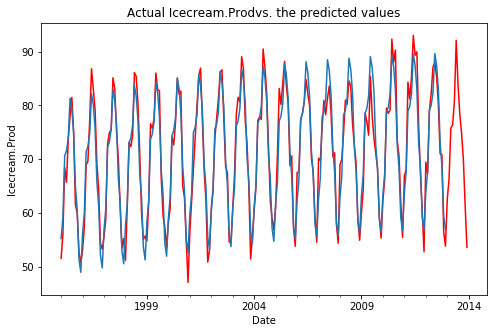

In [18]:
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
plot_mod_fit(Dairy, 'Icecream.Prod')

In [19]:
# Residuals
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

## Make the forecast for the next year
X = Dairy.loc['2012-12-31':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
RMSE(Dairy.loc['2012-12-31':, 'Icecream.Prod'].as_matrix(), mod_fit.predict(X))

C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


1.5459393430180361

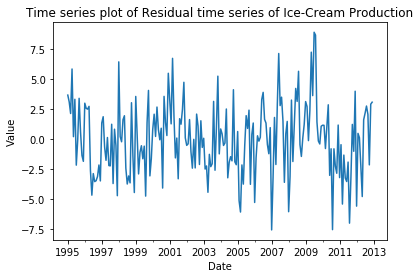

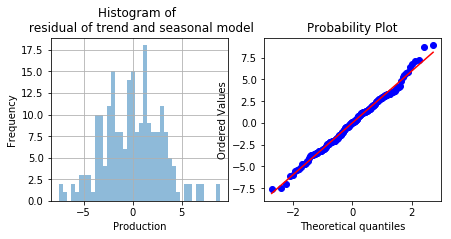

In [20]:
def plot_ts(ts, lab = ''):
    ts.plot()
    plt.title('Time series plot of ' + lab)
    plt.ylabel('Value')
    plt.xlabel('Date')
    
plot_ts(Dairy.loc[:'2013-12-31', 'resids'],'Residual time series of Ice-Cream Production')
dist_ts(Dairy.loc[:'2012-12-31', 'resids'], '\n residual of trend and seasonal model')

In [21]:
# Testing stationarity
DF_Test(Dairy.loc[:'2012-12-31', 'resids'])

D-F statistic = -3.8924463708478267
p-value = 0.002091146310817219
number of lags used = 15
Critical value at 5% confidence = -2.876102355
Critical value at 10% confidence = -2.574532225


In [22]:
# (Above) Reject the null hypothesis that the time series for ice cream production is not stationary at 95% confidence level

# Compute an ARIMA model for the residual using the step_ARIMA function we used earlier
BIC, order, model_fit = step_ARIMA(Dairy.loc[:'2012-12-31', 'resids'], 4, 3, 4)    
print('Best order = ' + str(order) + ' best BIC = ' + str(BIC))

Testing model of order: (0, 0, 1) with BIC = 1077.7895234312405
Testing model of order: (0, 0, 2) with BIC = 1082.5839455708121
Testing model of order: (0, 0, 3) with BIC = 1060.527672990147
Testing model of order: (0, 0, 4) with BIC = 1065.613847144987
Testing model of order: (0, 1, 1) with BIC = 1079.125763849743
Testing model of order: (0, 1, 3) with BIC = 1087.4255892356518
Testing model of order: (0, 2, 1) with BIC = 1169.5315527172963
Testing model of order: (1, 0, 0) with BIC = 1075.4541317025698
Testing model of order: (1, 0, 1) with BIC = 1074.7202626876654
Testing model of order: (1, 0, 2) with BIC = 1079.3882909928784
Testing model of order: (1, 0, 3) with BIC = 1065.4825691982292
Testing model of order: (1, 1, 0) with BIC = 1120.8044126058796
Testing model of order: (1, 1, 1) with BIC = 1081.901419618533
Testing model of order: (1, 1, 2) with BIC = 1077.1654426163907
Testing model of order: (1, 1, 3) with BIC = 1082.504976963804
Testing model of order: (1, 1, 4) with BIC = 

In [23]:
start_index = len(Dairy.loc[:'2012-12-31', 'resids'])
end_index = start_index + 12
model_prediction = model_fit.predict(start=start_index, end=end_index)
model_prediction

2013-01-31   -0.023234
2013-02-28    1.088693
2013-03-31    1.060365
2013-04-30    0.000000
2013-05-31    0.000000
2013-06-30    0.000000
2013-07-31    0.000000
2013-08-31    0.000000
2013-09-30    0.000000
2013-10-31    0.000000
2013-11-30    0.000000
2013-12-31    0.000000
2014-01-31    0.000000
Freq: M, dtype: float64

In [24]:
## Make the forecast for the next year
X = Dairy.loc['2012-12-31':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
## and the predictions for the forecast
Dairy.loc['2012-12-31':, 'scores'] =  mod_fit.predict(X) - model_prediction

C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


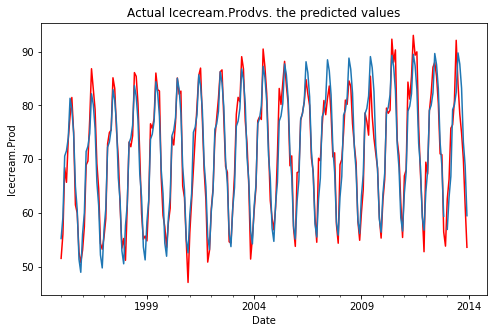

In [25]:
plot_mod_fit(Dairy, 'Icecream.Prod')

In [26]:
RMSE(Dairy.loc['2012-12-31':, 'Icecream.Prod'].as_matrix(), Dairy.loc['2012-12-31':, 'scores'])

C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


2.535264312639342